In [123]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as mticker
from scipy.stats import binomtest
from pard.grantham import grantham
import seaborn as sns

In [119]:
color_mapping12 = {
    "C>A": "deepskyblue",
    "G>T": "deepskyblue",
    "C>G": "black",
    "G>C": "black",
    "C>T": "red",
    "G>A": "red",
    "T>A": "silver",
    "A>T": "silver",
    "T>C": "yellowgreen",
    "A>G": "yellowgreen",
    "T>G": "pink",
    "A>C": "pink",
}
#sbs12_ordered = ["C>A", "G>T", "C>G", "G>C", "C>T", "G>A", "T>A", "A>T", "T>C", "A>G", "T>G", "A>C"]
sbs12_ordered = ["A>C", "A>G", "A>T", "C>A", "C>G", "C>T", "G>A", "G>C", "G>T", "T>A", "T>C", "T>G"]
colors12 = [color_mapping12[sbs] for sbs in sbs12_ordered]

In [94]:
df = pd.read_csv('../data/All_mutation_information.csv.gz')

C:\Users\voron\AppData\Local\Temp\ipykernel_2876\3160139400.py:1: DtypeWarning: Columns (13,14,15,16,17,18,19) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/All_mutation_information.csv.gz')


In [95]:
df.head()

,mutID,type,status 1,status 2,position in refseq (one_based),position_in_msa0117_alignment (start),position_in_msa0117_alignment (end),"(SBS) codon_position (0=noncoding, 1-3:position in triplet)",base(s) in status 1,base(s) in status 2,(SBS) mutation in sequence context,(SBS) gene,(SBS) AA change,(SBS) is coding,(SBS) is nonsynonymous,(SBS) is stopgain,(MBS/Indel) with flaking sequences in status 1,(MBS/Indel) with flaking sequences in status 2,(Indel) ins or del,(Indel) frame
0,sbs_10_TT>GT_633183_329639,SBS,node281658,hCoV-19/USA/LA-EVTL071/2020|EPI_ISL_451232|202...,10.0,122,122,0.0,T,G,TT>GT,5'UTR,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN
1,sbs_11_TT>CA_357288_6016,SBS,node5763,hCoV-19/USA/UT-UPHL-2012146142/2020|EPI_ISL_74...,11.0,123,123,0.0,T,C,TT>CA,5'UTR,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN
2,sbs_13_AT>AA_649653_348274,SBS,node298128,hCoV-19/USA/CA-CSMC203/2020|EPI_ISL_824612|202...,13.0,125,125,0.0,T,A,AT>AA,5'UTR,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN
3,sbs_13_AT>CA_631201_327314,SBS,node279676,hCoV-19/USA/LA-EVTL1196/2020|EPI_ISL_768465|20...,13.0,125,125,0.0,T,C,AT>CA,5'UTR,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN
4,sbs_13_AT>CA_611678_611679,SBS,node260153,node260154,13.0,125,125,0.0,T,C,AT>CA,5'UTR,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN


In [96]:
ns_mut_df = df[df['(SBS) is nonsynonymous'].isin(['TRUE', 'True'])]
ns_mut_df = ns_mut_df[ns_mut_df['base(s) in status 1'].isin(['A', 'T', 'G', 'C']) & ns_mut_df['base(s) in status 2'].isin(['A', 'T', 'G', 'C'])]

In [97]:
ns_mut_df.head()

,mutID,type,status 1,status 2,position in refseq (one_based),position_in_msa0117_alignment (start),position_in_msa0117_alignment (end),"(SBS) codon_position (0=noncoding, 1-3:position in triplet)",base(s) in status 1,base(s) in status 2,(SBS) mutation in sequence context,(SBS) gene,(SBS) AA change,(SBS) is coding,(SBS) is nonsynonymous,(SBS) is stopgain,(MBS/Indel) with flaking sequences in status 1,(MBS/Indel) with flaking sequences in status 2,(Indel) ins or del,(Indel) frame
98304,sbs_11083_TG>TT_374554_25324,SBS,node23029,hCoV-19/USA/WA-OHSU-1967/2020|EPI_ISL_526114|2...,11083.0,11894,11894,3.0,G,T,TG>TT,ORF1ab_nsp6,ORF1ab L3606F,TRUE,TRUE,FALSE,NaN,NaN,NaN,NaN
98305,sbs_11083_TG>TT_374579_25349,SBS,node23054,hCoV-19/USA/WA-OHSU-0525/2020|EPI_ISL_526098|2...,11083.0,11894,11894,3.0,G,T,TG>TT,ORF1ab_nsp6,ORF1ab L3606F,TRUE,TRUE,FALSE,NaN,NaN,NaN,NaN
98306,sbs_11083_TG>TT_374769_25615,SBS,node23244,hCoV-19/Scotland/QEUH-9E4E96/2020|EPI_ISL_6009...,11083.0,11894,11894,3.0,G,T,TG>TT,ORF1ab_nsp6,ORF1ab L3606F,TRUE,TRUE,FALSE,NaN,NaN,NaN,NaN
98307,sbs_11083_TG>TT_375636_26610,SBS,node24111,hCoV-19/England/NORW-E9999/2020|EPI_ISL_461839...,11083.0,11894,11894,3.0,G,T,TG>TT,ORF1ab_nsp6,ORF1ab L3606F,TRUE,TRUE,FALSE,NaN,NaN,NaN,NaN
98308,sbs_11083_TG>TT_375661_26642,SBS,node24136,hCoV-19/England/NORW-EAB65/2020|EPI_ISL_461884...,11083.0,11894,11894,3.0,G,T,TG>TT,ORF1ab_nsp6,ORF1ab L3606F,TRUE,TRUE,FALSE,NaN,NaN,NaN,NaN


In [98]:
ns_mut_df['aa_from'] = ns_mut_df['(SBS) AA change'].str.split(" ").str[1].str[0]
ns_mut_df['aa_to'] = ns_mut_df['(SBS) AA change'].str.split(" ").str[1].str[-1]
ns_mut_df['Aa_Mut'] = ns_mut_df['aa_from'] + '>' + ns_mut_df['aa_to']
ns_mut_df['Mut'] = ns_mut_df['base(s) in status 1'] + '>' + ns_mut_df['base(s) in status 2']
mut_with_aa = ns_mut_df[['Aa_Mut', 'Mut']]
mut_with_aa = mut_with_aa.drop_duplicates()

In [99]:
GainersGegen = ['F','L','I','Y']
LoosersGegen = ['P','A','R','G','T','S','H','Q','N','E']

Inter_U = ['S', 'V', 'L', 'C', 'W'] 

In [100]:
mut_throw_mut_spec = ns_mut_df[((ns_mut_df['aa_from'].isin(LoosersGegen) & ns_mut_df['aa_to'].isin(Inter_U)) |
                        (ns_mut_df['aa_from'].isin(Inter_U) & ns_mut_df['aa_to'].isin(GainersGegen)) |
                        (ns_mut_df['aa_from'].isin(LoosersGegen) & ns_mut_df['aa_to'].isin(GainersGegen))) &
                        (ns_mut_df['Mut'].isin(['C>T', 'G>T']))]['Aa_Mut'].unique()

anti_mut_spec = ns_mut_df[((ns_mut_df['aa_from'].isin(GainersGegen) & ns_mut_df['aa_to'].isin(LoosersGegen)) |
                        (ns_mut_df['aa_from'].isin(Inter_U) & ns_mut_df['aa_to'].isin(LoosersGegen)) |
                        (ns_mut_df['aa_from'].isin(GainersGegen) & ns_mut_df['aa_to'].isin(Inter_U))) &
                        (ns_mut_df['Mut'].isin(['T>C', 'T>G']))]['Aa_Mut'].unique()

In [101]:
df_aa_mut = ns_mut_df.pivot_table(index='Aa_Mut',values='position in refseq (one_based)', aggfunc='count').reset_index()

In [102]:
df_aa_mut['Mut_Sub'] = ''
df_aa_mut.loc[df_aa_mut['Aa_Mut'].isin(mut_throw_mut_spec), 'Mut_Sub'] = 1
df_aa_mut.loc[df_aa_mut['Aa_Mut'].isin(anti_mut_spec), 'Mut_Sub'] = -1
aa_mut_mut_spec = df_aa_mut[(df_aa_mut['Mut_Sub'] == 1)]

In [103]:
aa_mut_mut_spec['Anti_Aa_Mut'] = ''
aa_mut_mut_spec['Anti_Aa_Mut_count'] = 0
for index, row in aa_mut_mut_spec.iterrows():
    second = aa_mut_mut_spec['Aa_Mut'][index].split('>')[1]
    first = aa_mut_mut_spec['Aa_Mut'][index].split('>')[0]
    aa_mut_mut_spec['Anti_Aa_Mut'][index] = second+'>'+first
    try:
        aa_mut_mut_spec['Anti_Aa_Mut_count'][index] = df_aa_mut[df_aa_mut['Aa_Mut'] == aa_mut_mut_spec['Anti_Aa_Mut'][index]]['position in refseq (one_based)']
    except:
        print('Нет таких мутаций', second+'>'+first)

C:\Users\voron\AppData\Local\Temp\ipykernel_2876\2383027986.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aa_mut_mut_spec['Anti_Aa_Mut'] = ''
C:\Users\voron\AppData\Local\Temp\ipykernel_2876\2383027986.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aa_mut_mut_spec['Anti_Aa_Mut_count'] = 0
C:\Users\voron\AppData\Local\Temp\ipykernel_2876\2383027986.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.

In [104]:
aa_mut_mut_spec['direct_vs_reverse'] = aa_mut_mut_spec['position in refseq (one_based)'] / aa_mut_mut_spec['Anti_Aa_Mut_count']

C:\Users\voron\AppData\Local\Temp\ipykernel_2876\3653491019.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aa_mut_mut_spec['direct_vs_reverse'] = aa_mut_mut_spec['position in refseq (one_based)'] / aa_mut_mut_spec['Anti_Aa_Mut_count']


In [105]:
aa_mut_mut_spec

,Aa_Mut,position in refseq (one_based),Mut_Sub,Anti_Aa_Mut,Anti_Aa_Mut_count,direct_vs_reverse
12,A>S,1473,1,S>A,88,16.738636
14,A>V,2856,1,V>A,254,11.244094
16,C>F,249,1,F>C,32,7.781250
44,G>C,403,1,C>G,5,80.600000
49,G>V,332,1,V>G,44,7.545455
50,G>W,1,1,W>G,1,1.000000
57,H>Y,799,1,Y>H,197,4.055838
76,L>F,2748,1,F>L,413,6.653753
101,P>L,1203,1,L>P,245,4.910204
104,P>S,1330,1,S>P,181,7.348066


In [106]:
aa_mut_mut_spec['pvalue'] = 0
aa_mut_mut_spec['cilow'] = 0
aa_mut_mut_spec['cihigh'] = 0
aa_mut_mut_spec['gran_dist'] = 0
aa_mut_mut_spec['prob_success'] = 0

C:\Users\voron\AppData\Local\Temp\ipykernel_2876\1604073642.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aa_mut_mut_spec['pvalue'] = 0
C:\Users\voron\AppData\Local\Temp\ipykernel_2876\1604073642.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aa_mut_mut_spec['cilow'] = 0
C:\Users\voron\AppData\Local\Temp\ipykernel_2876\1604073642.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveat

In [107]:
aa_mut_mut_spec['AaParent'] = aa_mut_mut_spec['Aa_Mut'].astype(str).str.split('>').str[0]
aa_mut_mut_spec['AaChild'] = aa_mut_mut_spec['Aa_Mut'].astype(str).str.split('>').str[1]

C:\Users\voron\AppData\Local\Temp\ipykernel_2876\1744623628.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aa_mut_mut_spec['AaParent'] = aa_mut_mut_spec['Aa_Mut'].astype(str).str.split('>').str[0]
C:\Users\voron\AppData\Local\Temp\ipykernel_2876\1744623628.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aa_mut_mut_spec['AaChild'] = aa_mut_mut_spec['Aa_Mut'].astype(str).str.split('>').str[1]


In [108]:
for index, row in aa_mut_mut_spec.iterrows():
    aa_mut_mut_spec['pvalue'][index] = binomtest(aa_mut_mut_spec['position in refseq (one_based)'][index], 
                                      n=aa_mut_mut_spec['position in refseq (one_based)'][index]+aa_mut_mut_spec['Anti_Aa_Mut_count'][index], 
                                      p=0.5, alternative='greater').pvalue
    aa_mut_mut_spec['cilow'][index] = binomtest(aa_mut_mut_spec['position in refseq (one_based)'][index], 
                                      n=aa_mut_mut_spec['position in refseq (one_based)'][index]+aa_mut_mut_spec['Anti_Aa_Mut_count'][index], 
                                      p=0.5, alternative='greater').proportion_ci(confidence_level=0.95).low
    aa_mut_mut_spec['cihigh'][index] = binomtest(aa_mut_mut_spec['position in refseq (one_based)'][index], 
                                      n=aa_mut_mut_spec['position in refseq (one_based)'][index]+aa_mut_mut_spec['Anti_Aa_Mut_count'][index], 
                                      p=0.5, alternative='greater').proportion_ci(confidence_level=0.95).high
    aa_mut_mut_spec['gran_dist'][index] = grantham(aa_mut_mut_spec['AaParent'][index].split('_')[0], aa_mut_mut_spec['AaChild'][index].split('_')[0])
    
    aa_mut_mut_spec['prob_success'][index] = binomtest(aa_mut_mut_spec['position in refseq (one_based)'][index], 
                                      n=aa_mut_mut_spec['position in refseq (one_based)'][index]+aa_mut_mut_spec['Anti_Aa_Mut_count'][index], 
                                      p=0.5, alternative='greater').statistic

C:\Users\voron\AppData\Local\Temp\ipykernel_2876\384674788.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aa_mut_mut_spec['pvalue'][index] = binomtest(aa_mut_mut_spec['position in refseq (one_based)'][index],
C:\Users\voron\AppData\Local\Temp\ipykernel_2876\384674788.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aa_mut_mut_spec['cilow'][index] = binomtest(aa_mut_mut_spec['position in refseq (one_based)'][index],
C:\Users\voron\AppData\Local\Temp\ipykernel_2876\384674788.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http

In [109]:
aa_mut_mut_spec['aster'] = ''
aa_mut_mut_spec.loc[aa_mut_mut_spec['pvalue'] <= 0.05,'aster'] = '*'
aa_mut_mut_spec.loc[aa_mut_mut_spec['pvalue'] <= 0.01,'aster'] = '**'
aa_mut_mut_spec.loc[aa_mut_mut_spec['pvalue'] <= 0.001,'aster'] = '***'

C:\Users\voron\AppData\Local\Temp\ipykernel_2876\1872013174.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aa_mut_mut_spec['aster'] = ''


In [110]:
aa_mut_mut_spec = aa_mut_mut_spec.sort_values(by='gran_dist', ascending=False).reset_index(drop=True)

In [111]:
aa_mut_mut_spec = aa_mut_mut_spec.rename(columns={"position in refseq (one_based)": "Aa_Mut_count"})

In [112]:
aa_mut_mut_spec = aa_mut_mut_spec.merge(mut_with_aa, how='left', on='Aa_Mut')

In [113]:
aa_mut_mut_spec = aa_mut_mut_spec[aa_mut_mut_spec['Mut'].isin(['C>T', 'G>T'])]
aa_mut_mut_spec = aa_mut_mut_spec.reset_index(drop=True)

In [114]:
aa_mut_mut_spec.to_csv('../data_obtain/aa_vith_versus_bin_test')

In [116]:
aa_mut_mut_spec

,Aa_Mut,Aa_Mut_count,Mut_Sub,Anti_Aa_Mut,Anti_Aa_Mut_count,direct_vs_reverse,pvalue,cilow,cihigh,gran_dist,prob_success,AaParent,AaChild,aster,Mut,color
0,C>F,249,1,F>C,32,7.781250,4.085175e-43,0.850071,1,205,0.886121,C,F,***,G>T,
1,G>W,1,1,W>G,1,1.000000,7.500000e-01,0.025321,1,184,0.500000,G,W,,G>T,
2,R>C,288,1,C>R,35,8.228571,6.321867e-51,0.858907,1,180,0.891641,R,C,***,C>T,
3,G>C,403,1,C>G,5,80.600000,1.407966e-112,0.974407,1,159,0.987745,G,C,***,G>T,
4,S>F,665,1,F>S,143,4.650350,1.724522e-81,0.799450,1,155,0.823020,S,F,***,C>T,
5,S>L,819,1,L>S,172,4.761628,8.398567e-102,0.805431,1,145,0.826438,S,L,***,C>T,
6,S>I,274,1,I>S,35,7.828571,2.021275e-47,0.852639,1,142,0.886731,S,I,***,G>T,
7,R>S,133,1,S>R,30,4.433333,5.580883e-17,0.758749,1,110,0.815951,R,S,***,G>T,
8,G>V,332,1,V>G,44,7.545455,4.171131e-56,0.852101,1,109,0.882979,G,V,***,G>T,
9,R>L,116,1,L>R,20,5.800000,6.122685e-18,0.793524,1,102,0.852941,R,L,***,G>T,


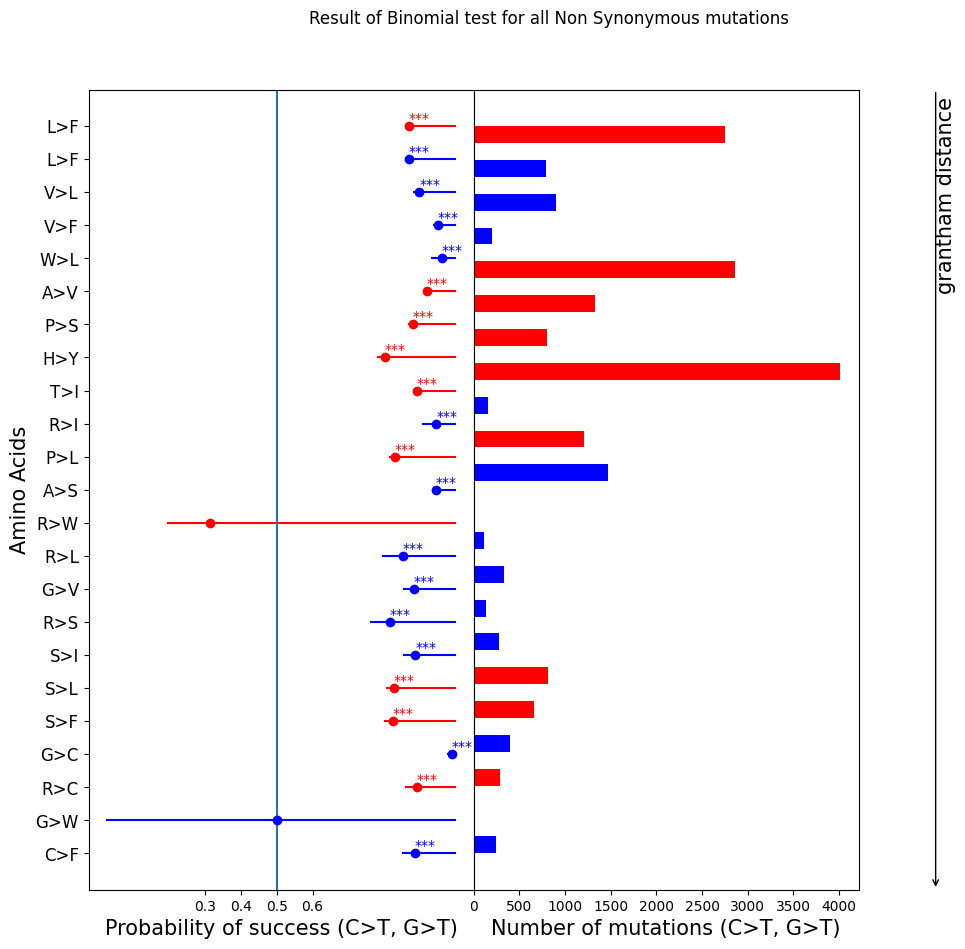

In [118]:
fig, ax = plt.subplots(1,2,figsize=(11,10))
min_error = list(aa_mut_mut_spec['prob_success'] - aa_mut_mut_spec['cilow'])
max_error = list(aa_mut_mut_spec['cihigh'] - aa_mut_mut_spec['prob_success'])
error = []
for i in range(len(min_error)):
    error.append([min_error[i], max_error[i]])
error = np.array(error)
aa_mut_mut_spec['color'] = ''
aa_mut_mut_spec.loc[aa_mut_mut_spec['Mut']=='C>T', 'color'] = 'red'
aa_mut_mut_spec.loc[aa_mut_mut_spec['Mut']=='G>T', 'color'] = 'blue'

for i in range(len(aa_mut_mut_spec['color'])):
    er = ax[0].errorbar(aa_mut_mut_spec['prob_success'][i], i, xerr=error[i].reshape(2, -1), marker="o", linestyle="none", color=aa_mut_mut_spec['color'][i])

ax[0].set_yticks(np.arange(len(aa_mut_mut_spec['Aa_Mut'])))
ax[0].set_yticklabels(aa_mut_mut_spec['Aa_Mut'], fontsize=12)

ax[0].set_xlabel('Probability of success (C>T, G>T)', size=15)
ax[0].set_ylabel('Amino Acids', size=15)
# ax.text(5.5,26, 'Odds_ratio with CI 95%')
# ax.text(7,26, 'p_value')
# ax.text(8,26, 'Aa status')

i=0
aa_mut_mut_spec.loc[aa_mut_mut_spec['aster'].isna(),'aster'] = ''
for index, row in aa_mut_mut_spec.iterrows():
    if aa_mut_mut_spec['Mut'][index] == 'C>T':
        ax[0].text(aa_mut_mut_spec['prob_success'][index]-0.001, i+0.1, aa_mut_mut_spec['aster'][index], color='red')
    elif aa_mut_mut_spec['Mut'][index] == 'G>T':
        ax[0].text(aa_mut_mut_spec['prob_success'][index]-0.001, i+0.1, aa_mut_mut_spec['aster'][index], color='blue')
    i+=1
#     if aa_statistics_fisher['p_value'][index] < 0.05:
#         ax.text(5.5,i, aa_statistics_fisher['odds_ratio_with_CI'][index], color='red')
#         ax.text(7,i, round(aa_statistics_fisher['p_value'][index],4), color='red')
#         ax.text(8,i, aa_statistics_fisher['aa_status'][index], color='red')
#     else:
#         ax.text(5.5,i, aa_statistics_fisher['odds_ratio_with_CI'][index])
#         ax.text(7,i, round(aa_statistics_fisher['p_value'][index],4))
#         ax.text(8,i, aa_statistics_fisher['aa_status'][index])
#     i = i+1
#  besides ORF1ab or in ORF1ab
ax[0].axvline(x=0.5)
ax[0].get_xaxis().set_ticks([0.30, 0.40, 0.50, 0.60])

ax[1].barh(y=aa_mut_mut_spec['Aa_Mut'], width=aa_mut_mut_spec['Aa_Mut_count'], height = 0.5, color=aa_mut_mut_spec['color'])
#ax[1].barh(y=aa_mut_mut_spec['Aa_Mut'], width=aa_mut_mut_spec['Anti_Aa_Mut_count'], left = aa_mut_mut_spec['Aa_Mut_count'], height = 0.5, color='green')
ax[1].get_yaxis().set_ticks([])
ax[1].set_xlabel('Number of mutations (C>T, G>T)', size=15)
plt.subplots_adjust(left=0.3,
                    bottom=0.1, 
                    right=1.0, 
                    top=0.9, 
                    wspace=0, 
                    hspace=0.4)
fig.suptitle('Result of Binomial test for all Non Synonymous mutations', horizontalalignment='left')
ax[1].annotate('', xy=(1.2, 1), xycoords='axes fraction', xytext=(1.2, 0), 
            arrowprops=dict(arrowstyle="<-", color='black'))
plt.text(1.07, 0.7, 'grantham distance', fontsize=15, rotation=90, transform=plt.gcf().transFigure)
plt.show()
fig.savefig('../figures/binom_test_all.pdf', dpi=300, bbox_inches = 'tight')

In [126]:
ns_mut_df['counter'] = ns_mut_df.index
data = ns_mut_df[['Mut', 'counter']].groupby(['Mut'], as_index=False).count()

In [121]:
#n_mut = int(sum(data['counter']))
#max_mut = int(max(data['counter']))
#data['counter'] = data['counter']/n_mut

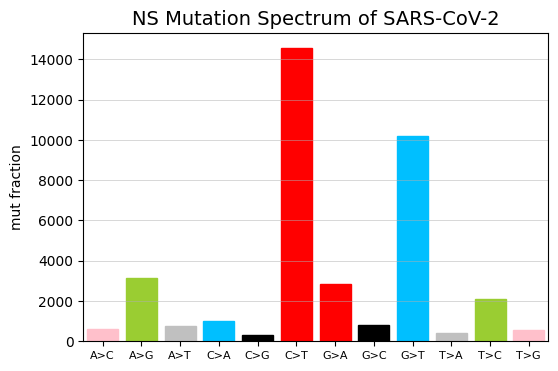

In [127]:
fig = plt.figure(figsize=(6, 4))
ax = sns.barplot(x="Mut", y='counter', data=data, order=sbs12_ordered, ax=fig.gca())
ax.grid(axis="y", alpha=.7, linewidth=0.5)
for bar, clr in zip(ax.patches, colors12):
    bar.set_color(clr)
ax.set_title('NS Mutation Spectrum of SARS-CoV-2', fontsize=14)
ax.set_xlabel("")
ax.set_ylabel("mut fraction")
plt.xticks(fontsize=8)
plt.show()
plt.close()